In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_csv("data_set.csv")

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.665,0.525,0.155,1.3575,0.5325,0.3045,0.4485,10
2,M,0.675,0.520,0.145,1.3645,0.5570,0.3405,0.3850,11
3,F,0.680,0.520,0.185,1.4940,0.6150,0.3935,0.4060,11
4,F,0.680,0.560,0.195,1.6640,0.5800,0.3855,0.5450,11


First we will compute the target variable of the problem 'Age', Age = 1.5+Rings

In [4]:
df['Age'] = df['Rings'] + 1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.665,0.525,0.155,1.3575,0.5325,0.3045,0.4485,10,11.5
2,M,0.675,0.520,0.145,1.3645,0.5570,0.3405,0.3850,11,12.5
3,F,0.680,0.520,0.185,1.4940,0.6150,0.3935,0.4060,11,12.5
4,F,0.680,0.560,0.195,1.6640,0.5800,0.3855,0.5450,11,12.5


we will drop Rings columns since it is highly correlated with age and will therefore affect our model.

In [5]:
df = df.drop('Rings', axis = 1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.665,0.525,0.155,1.3575,0.5325,0.3045,0.4485,11.5
2,M,0.675,0.520,0.145,1.3645,0.5570,0.3405,0.3850,12.5
3,F,0.680,0.520,0.185,1.4940,0.6150,0.3935,0.4060,12.5
4,F,0.680,0.560,0.195,1.6640,0.5800,0.3855,0.5450,12.5


In [6]:
#a.	What are the number of rows; no. & types of variables
print('No of rows = ',df.shape[0])
print('No of columns = ',df.shape[1])

No of rows =  1105
No of columns =  9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 9 columns):
Sex               1105 non-null object
Length            1105 non-null float64
Diameter          1105 non-null float64
Height            1105 non-null float64
Whole weight      1105 non-null float64
Shucked weight    1105 non-null float64
Viscera weight    1105 non-null float64
Shell weight      1105 non-null float64
Age               1105 non-null float64
dtypes: float64(8), object(1)
memory usage: 77.8+ KB


In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,0.528086,0.410932,0.139765,0.840694,0.362264,0.183954,0.241870,11.447511
std,0.118329,0.097287,0.037942,0.483234,0.215120,0.109298,0.135685,3.032576
min,0.140000,0.105000,0.000000,0.014500,0.005000,0.000500,0.005000,4.500000
25%,0.455000,0.350000,0.115000,0.452000,0.192000,0.094500,0.135000,9.500000
50%,0.550000,0.425000,0.145000,0.803500,0.339500,0.171000,0.235000,11.500000
75%,0.620000,0.485000,0.165000,1.173500,0.506000,0.260000,0.335000,12.500000
max,0.780000,0.605000,0.235000,2.548000,1.245500,0.575000,0.725000,25.500000


In [9]:
df.describe(include= 'object')

,Sex
count,1105
unique,3
top,M
freq,401


In [10]:
df['Sex'].value_counts()

M    401
I    354
F    350
Name: Sex, dtype: int64

In [11]:
num_features = df.select_dtypes(include=[np.number])
num_features.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [12]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Sex'], dtype='object')

In [13]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

There are no missing values in the data.

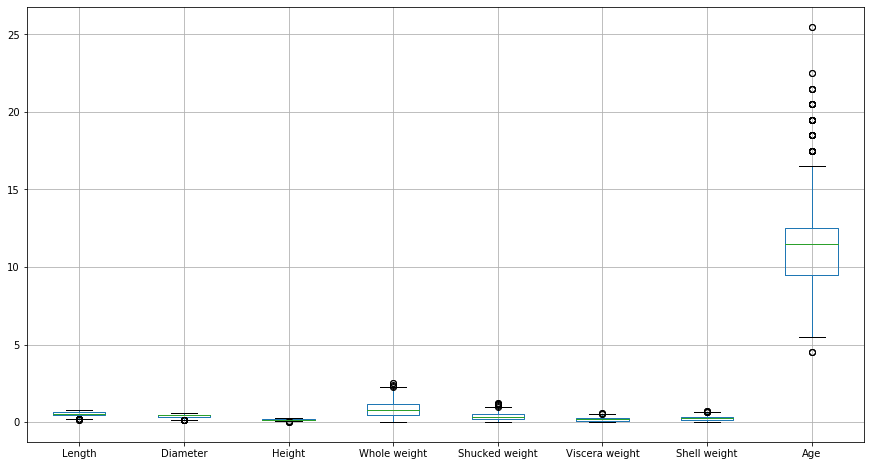

In [14]:
plt.figure(figsize = (15,8))
num_features.boxplot()
plt.show()

Since the range for Age is larger than the other attributes, we will plot the boxplot again by dropping out Age, to visualize the other attributes properly. 

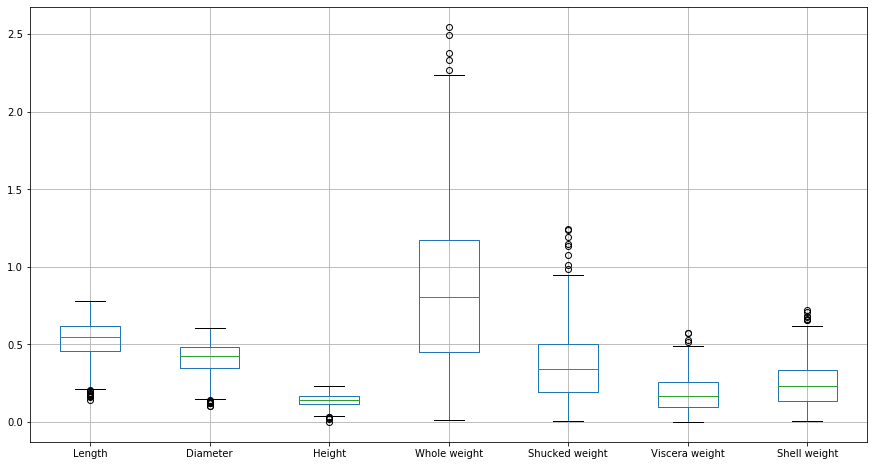

In [15]:
num_features1 = num_features.drop('Age', axis = 1)
plt.figure(figsize = (15,8))
num_features1.boxplot()
plt.show()

From the above boxplots, we can see that all the attributes have outliers. 

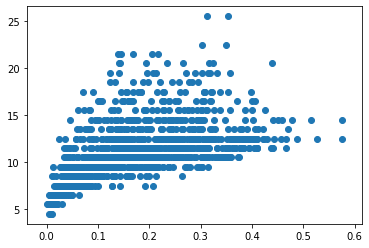

In [16]:
#Outlier treatment
plt.scatter(x = df['Viscera weight'], y = df['Age'])
plt.show()

In [17]:
df.drop(df[(df['Viscera weight'] > 0.5) & (df['Age']< 20)].index, inplace= True)
df.drop(df[(df['Viscera weight'] < 0.5) & (df['Age']>25)].index, inplace = True)

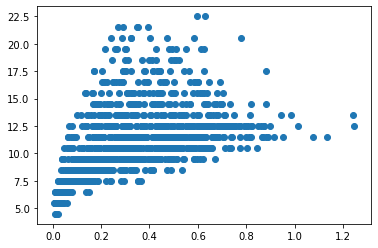

In [18]:
plt.scatter(x = df['Shucked weight'], y = df['Age'])
plt.show()

In [19]:
df.drop(df[(df['Shucked weight'] > 1) & (df['Age']< 20)].index, inplace= True)
df.drop(df[(df['Shucked weight'] < 1) & (df['Age']>22)].index, inplace = True)

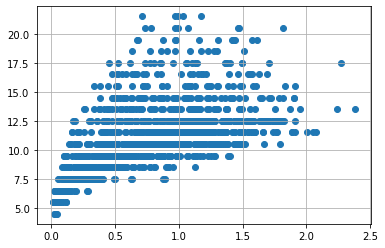

In [20]:
plt.scatter(x = df['Whole weight'], y = df['Age'])
plt.grid(True)
plt.show()

In [21]:
df.drop(df[(df['Whole weight'] > 2) & (df['Age']< 25)].index, inplace= True)
df.drop(df[(df['Whole weight'] < 2) & (df['Age']>25)].index, inplace = True)

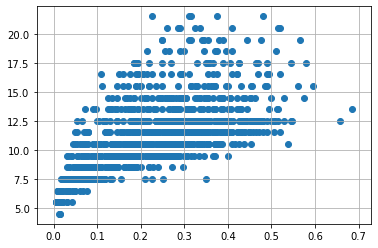

In [22]:
plt.scatter(x = df['Shell weight'], y = df['Age'])
plt.grid(True)
plt.show()

In [23]:
df.drop(df[(df['Shell weight'] > 0.6) & (df['Age']< 25)].index, inplace= True)
df.drop(df[(df['Shell weight'] < 0.8) & (df['Age']>25)].index, inplace = True)

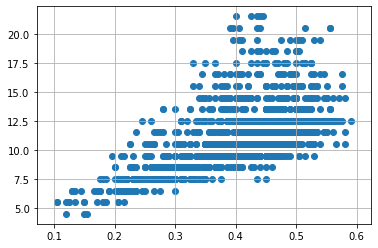

In [24]:
plt.scatter(x = df['Diameter'], y = df['Age'])
plt.grid(True)
plt.show()

In [25]:
df.drop(df[(df['Diameter'] < 0.2) & (df['Age']< 5)].index, inplace= True)
df.drop(df[(df['Diameter'] < 0.8) & (df['Age']>25)].index, inplace = True)

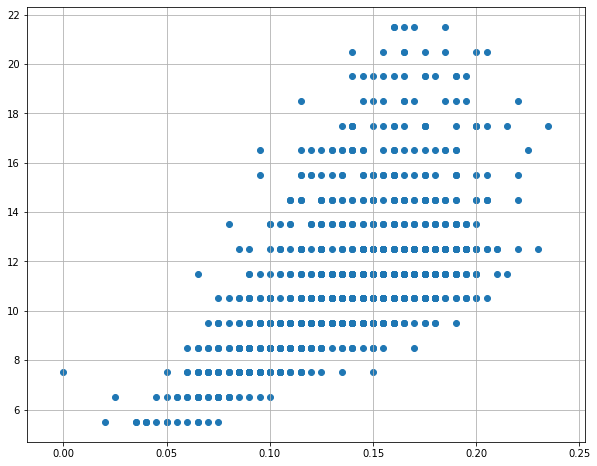

In [26]:
plt.figure(figsize = (10,8))
plt.scatter(x = df['Height'], y = df['Age'])
plt.grid(True)
plt.show()

In [27]:
df.drop(df[(df['Height'] <= 0.03) & (df['Age']< 10)].index, inplace= True)

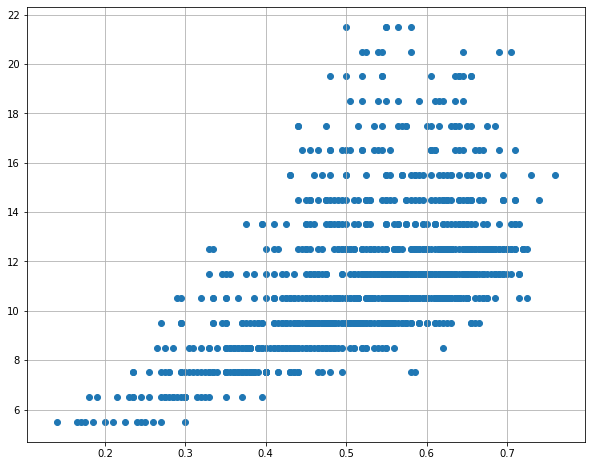

In [28]:
plt.figure(figsize = (10,8))
plt.scatter(x = df['Length'], y = df['Age'])
plt.grid(True)
plt.show()

In [29]:
df.drop(df[(df['Length'] < 0.1) & (df['Age']< 5)].index, inplace= True)
df.drop(df[(df['Length'] < 0.8) & (df['Age']>25)].index, inplace = True)

In [30]:
df.shape

(1078, 9)

In [31]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

Length           -0.646977
Diameter         -0.645887
Height           -0.276743
Whole weight      0.252181
Shucked weight    0.373923
Viscera weight    0.382994
Shell weight      0.257818
Age               0.776726
dtype: float64


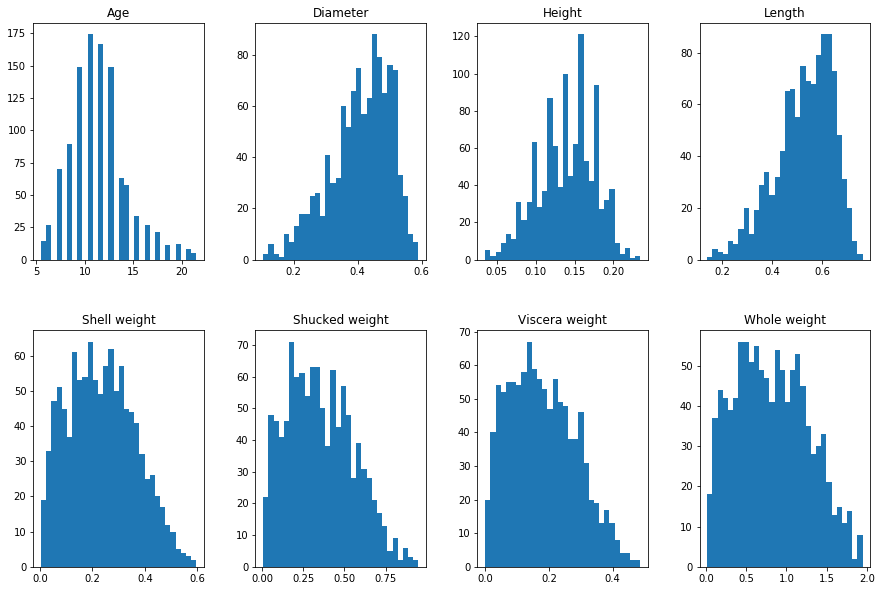

In [33]:
print(df.skew())
df.hist(figsize= (15,10), grid = False, layout = (2,4), bins  = 30)
plt.show()

From the above plots we can see that data is not normally distributed.
Diameter, length and Height are left skewed.
Age, Shell Weight, Shucked weight Viscera weight, whole weight are right skewed.

Ideally, if the data is normally distributed, we get good results from the model. But even when the data is skewed, we can do data transformation to get the data close to normal distribution.

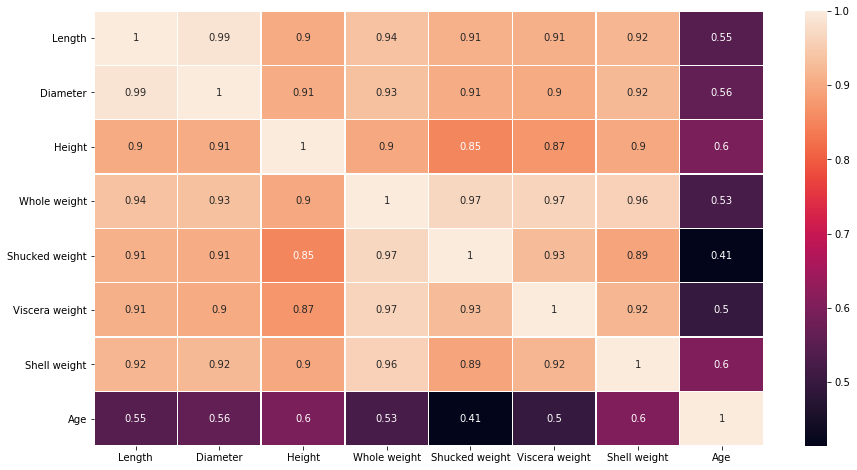

In [34]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, linewidths= 0.5)
plt.show()

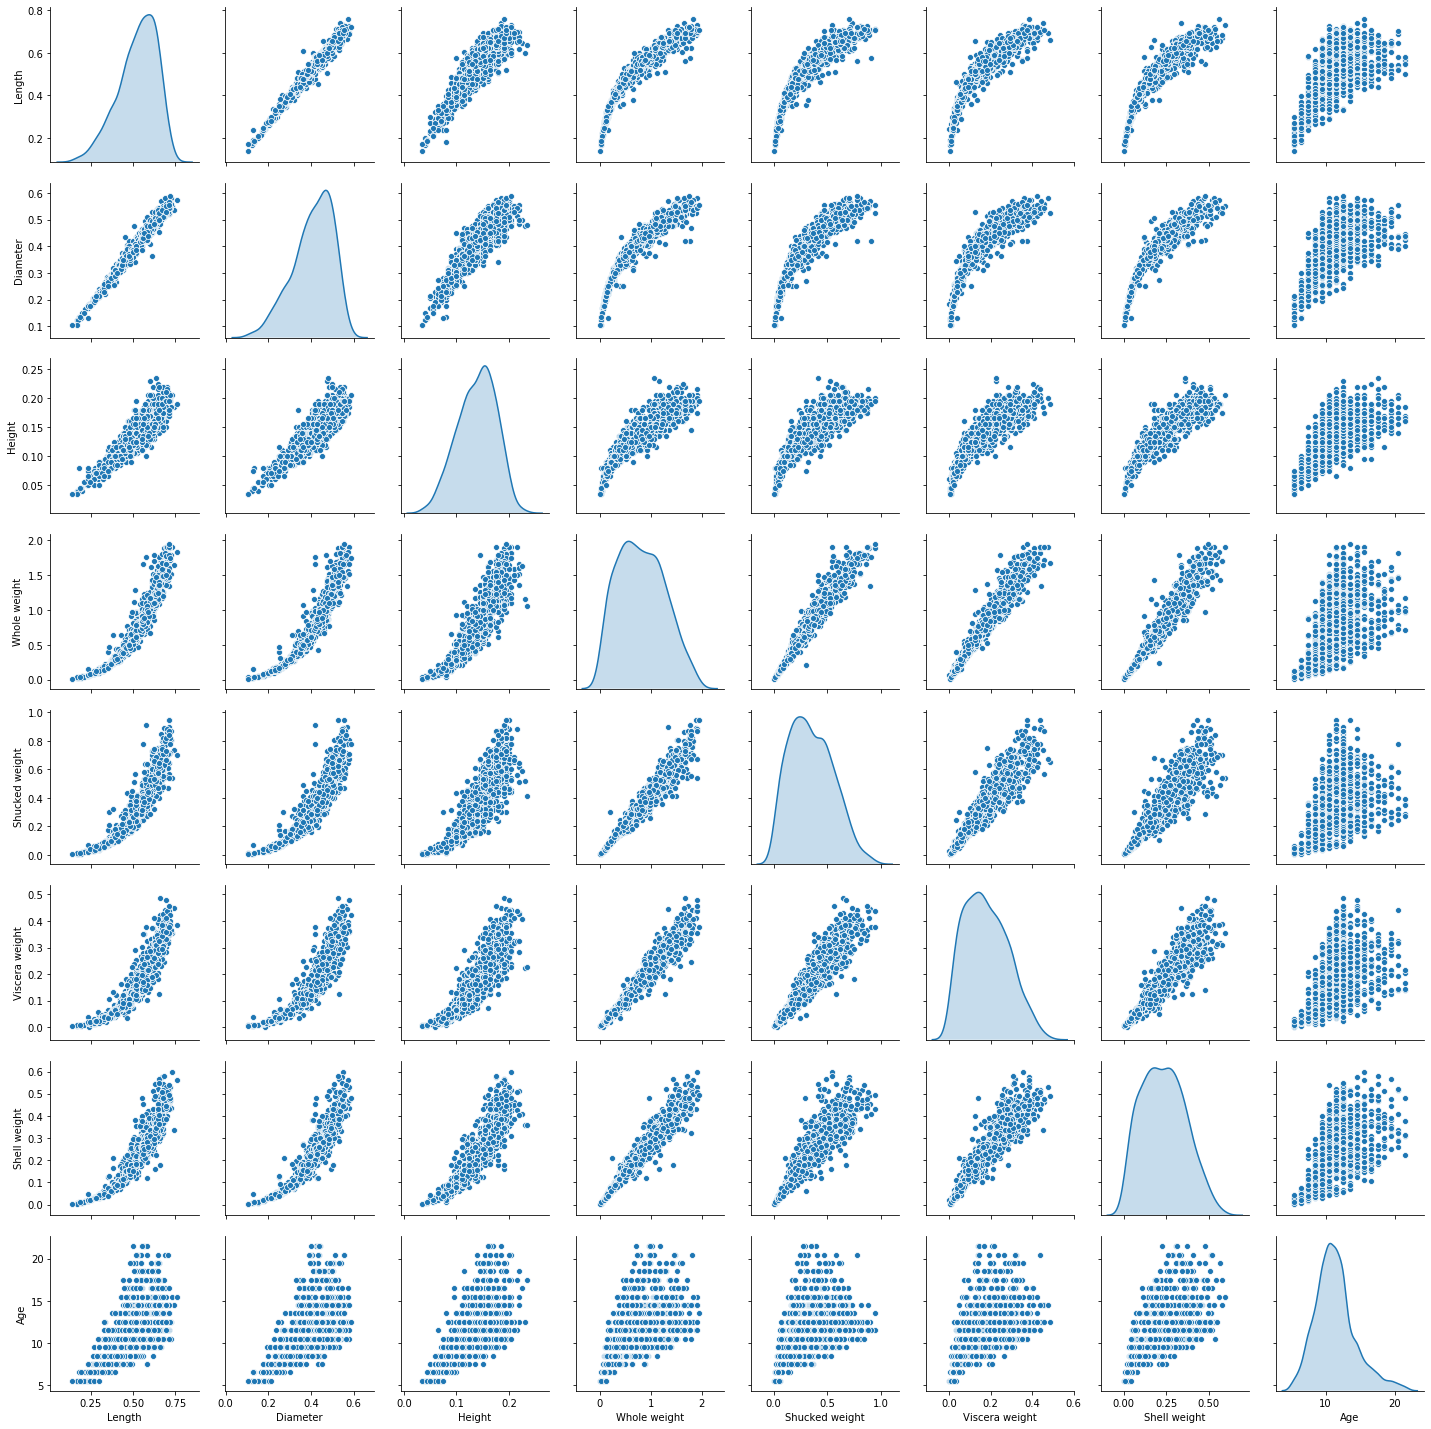

In [35]:
sns.pairplot(df, diag_kind= 'kde')
plt.show()

Length is linearly correlated with diameter, while non linear with height, whole weight, shucked weight, viscera weight and shell weight.

Whole weight is almost linearlly varying with all features excpet Age.

Height has least linearity with remaining features.

The High corelation coefficients among features can result into multi collinearity. 
We will check for multi collinearity after building the base model.


In [36]:
dummy = pd.get_dummies(df['Sex'], prefix= 'Sex', drop_first= True)

In [37]:
df = pd.concat([df, dummy], axis = 1)
df.drop('Sex', axis = 1, inplace = True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5,0,1
1,0.665,0.525,0.155,1.3575,0.5325,0.3045,0.4485,11.5,0,1
2,0.675,0.520,0.145,1.3645,0.5570,0.3405,0.3850,12.5,0,1
3,0.680,0.520,0.185,1.4940,0.6150,0.3935,0.4060,12.5,0,0
4,0.680,0.560,0.195,1.6640,0.5800,0.3855,0.5450,12.5,0,0


In [38]:
X = df.drop('Age', axis = 1)
y = df['Age']

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [66]:
X_c = sm.add_constant(X_sc)

In [99]:
xc = pd.DataFrame(X_sc, columns = X.columns)

In [91]:
from sklearn. model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_c, y, test_size = 0.3, random_state = 10)

print('Xtrain shape ',xtrain.shape)
print('Xtest shape ',xtest.shape)
print('ytrain shape ',ytrain.shape)
print('ytest shape ',ytest.shape)

Xtrain shape  (754, 10)
Xtest shape  (324, 10)
ytrain shape  (754,)
ytest shape  (324,)


In [92]:
reg_mod = sm.OLS(ytrain, xtrain).fit()
reg_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     88.82
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          1.15e-111
Time:                        11:46:45   Log-Likelihood:                -1590.9
No. Observations:                 754   AIC:                             3202.
Df Residuals:                     744   BIC:                             3248.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3958      0.073    155.462      0.000      11.252      11.540
x1            -0.1469      0.467     -0.314      0.753      -1.064       0.770
x2             0.7432      0.472      1.574      0.116      -0.184       1.670
x3             1.0420      0.186      5.607      0.000       0.677       1.407
x4             3.2484      0.733      4.431      0.000       1.809       4.688
x5            -3.6299      0.368     -9.872      0.000      -4.352      -2.908
x6            -1.0016      0.310     -3.232      0.001      -1.610      -0.393
x7             1.1530      0.346      3.336      0.001       0.475       1.831
x8            -0.2912      0.105     -2.768      0.006      -0.498      -0.085
x9             0.0994      0.086      1.154      0.249      -0.070       0.268
==============================================================================
Omnibus:                      123.836   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.204
Skew:                           0.998   Prob(JB):                     2.52e-48
Kurtosis:                       4.730   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
print('Overall R2 train = ', round(reg_mod.rsquared, 4))

Overall R2 train =  0.5179


In [70]:
#b.	What is the adjusted R2? Is it different from R2? Why?

print('Adjusted R2 = ', round(reg_mod.rsquared_adj, 4))

Adjusted R2 =  0.5121


In [71]:
reg_mod.pvalues< 0.05

const     True
x1       False
x2       False
x3        True
x4        True
x5        True
x6        True
x7        True
x8        True
x9       False
dtype: bool

We can see that x3 to x8 all the variables are significant.
i.e the significant variables are Height, Whole Weight, SHucked weight, Viscera weight, Shell weight, sex_i

To improve the accuracy, we will use Recursive Feature Elimination to get the best features. 

In [100]:
xtrain, xtest, ytrain, ytest = train_test_split(xc, y, test_size = 0.3, random_state = 10)

print('Xtrain shape ',xtrain.shape)
print('Xtest shape ',xtest.shape)
print('ytrain shape ',ytrain.shape)
print('ytest shape ',ytest.shape)

Xtrain shape  (754, 9)
Xtest shape  (324, 9)
ytrain shape  (754,)
ytest shape  (324,)


In [101]:
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select = 6)
rfe_model = rfe.fit(xtrain, ytrain)

feat_index = pd.Series(data = rfe_model.ranking_,  index = xtrain.columns)

sig_feature_rfe = feat_index[feat_index == 1].index
print(sig_feature_rfe)

Index(['Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


In [104]:
xtrain_new = xtrain[['Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
xtest_new = xtest[['Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
lr = LinearRegression()
lr.fit(xtrain_new, ytrain)

lr.score(xtrain_new, ytrain)

0.507449474434308

In [107]:
from sklearn.metrics import r2_score
ypred_train = lr.predict(xtrain_new)
ypred_test = lr.predict(xtest_new)

print('R2 Train = ', r2_score(ytrain, ypred_train))
print('R2 Test = ', r2_score(ytest, ypred_test))

R2 Train =  0.507449474434308
R2 Test =  0.4966261529312682


In [108]:
def get_score(model, xtrain_k, xtest_k, ytrain_k, ytest_k):
    model.fit(xtrain_k, ytrain_k)
    return model.score(xtest_k, ytest_k)

In [115]:
from sklearn.model_selection import KFold
lr = LinearRegression()
kf = KFold(n_splits = 5)

scores = []

for train_index, test_index in kf.split(xtrain):
    xtrain_k, xtest_k, ytrain_k, ytest_k = xtrain.iloc[train_index], xtrain.iloc[test_index], ytrain.iloc[train_index], ytrain.iloc[test_index]
    
    scores.append(get_score(lr, xtrain_k, xtest_k, ytrain_k, ytest_k))
    
        

In [116]:
print('All scores: ', scores)

All scores:  [0.5345604447502903, 0.5282716307461026, 0.49642719537656543, 0.4572889070089835, 0.4693053515905953]


In [111]:
def plot_coef (model, algo):
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficients': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficients', ascending= False)
    sns.barplot(x = 'Coefficients', y = 'Variable', data = sorted_coeff)
    plt.xlabel('Coefficients from {}'.format(algo))
    plt.ylabel('Features')

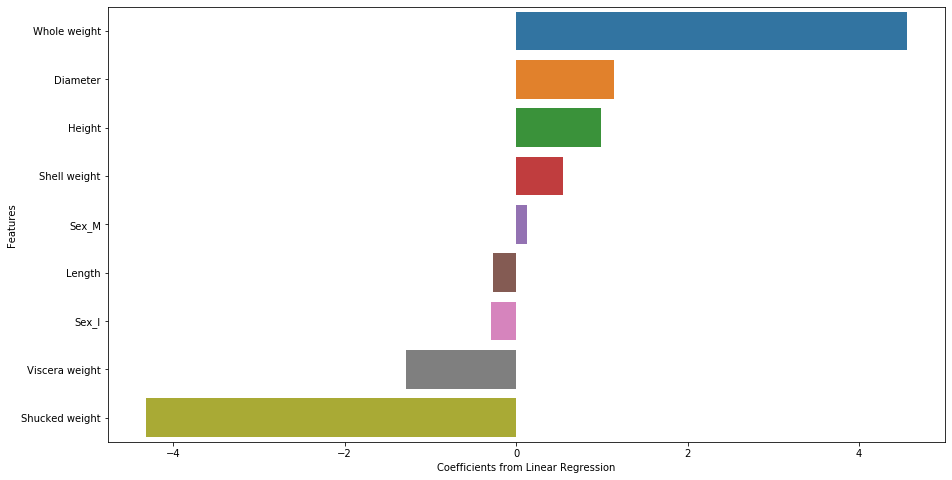

In [113]:
plt.figure(figsize = (15,8))
plot_coef(lr, 'Linear Regression')
plt.show()

Sex_M, Sex_I and length have coefficients very near to 0. 